# Predstavitev mang

## Priprave

In [2]:

import pandas
import matplotlib.pyplot as plt

## Uvod

V seminarski nalogi je moj namen analizirati podatke o mangah, ki se sem jih našel na spletni strani mangareader.to in jih predstaviti na naćin, da bo tematika razumljiva širši publiki. 

### Kaj je manga?

Manga je krajši japonski črno-beli strip (20 strani na poglavje) z občasnimi barvnimi stranmi. Prav tako pa z izrazom manga označujemo stripe, ki niso bili napisani v japonščini, ampak je stil pisanja in ilustriranja zelo podoben japonskim mangam.   

### Splošni podatki

In [3]:
 pandas.read_csv('together.csv', index_col='id')
    

,imena,žanri,jeziki,št poglavij
id,,,,
0,1 Second,"['Action', 'Supernatural']",EN,23.0
1,1518!,"['School', 'Seinen']",EN,13.0
2,20 Seiki Shounen: Ujiko Ujio Sakuhinshuu,"['Comedy', 'Mystery', 'Ecchi']",nedoločen,0.0
3,3x3 Eyes: Kiseki no Yami no Keiyakusha,"['Action', 'Fantasy', 'Supernatural']",JA,48.5
4,47 Taisen,"['Action', 'Fantasy']",JA,14.0
...,...,...,...,...
9997,Zako Hime-sama wa Ikinobitai!,['Fantasy'],JA,4.0
9998,Zangyaku Sugiru Isekai Demo Suzuki wa Kawaii,"['Fantasy', 'Seinen']",JA,11.0
9999,Zanki x 99,"['Game', 'Horror']",EN,7.0


Po analizi spletne strani sem ugotovil, da je skupaj več kot 10000 mang, med katere so vključene tudi manhwa in manhue, o njihove razlike v primerjavi z mangami bom pojasnil kasneje. 

## Jeziki

Originalne mange se pišejo v japonščini, obstajajo pa tudi kitajske in korejske različice mang (manhue in manhwe), ki pa jih zaradi manjšega vzorca neprevedenih del ne bom posebej obravnaval (v spodnjem grafu so pod "nedoločen"). Večina mang je prevedenih v angleščino. 

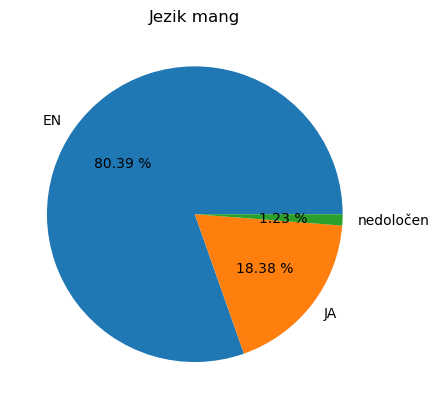

In [3]:
podatki = pandas.read_csv('together.csv')
EN = podatki.loc[podatki['jeziki'] == 'EN'].count()[0]
JA = podatki.loc[podatki['jeziki'] == 'JA'].count()[0]
nedolocen = podatki.loc[podatki['jeziki'] == 'nedoločen'].count()[0]
labels = ['EN', 'JA', 'nedoločen']
plt.pie([EN, JA, nedolocen], labels = labels, autopct='%.2f %%')
plt.title('Jezik mang')
plt.show()

Z grafa je razvidno, da je večina del prevedenih v angleščino (80%), medtem ko jih manjši del (18%) še ni prevedenih. Prav tako pa je 1% mang v kategoriji nedoločeni, kar lahko pomeni, da za določen naslov mange še ni bilo objavljeno nobenega poglavja mange ali pa manga na tej strani ni prevedena v angleščino ali japonščino. 

## Žanri

Žanr je splošna tema mange. Manga ima načeloma več žanrov (npr. "Action" in "Fantasy"). Med najbolj priljubljenimi žanri so Action, Comedy, Romance in Fantasy.

In [6]:
podatki = pandas.read_csv('together.csv', index_col='id')
podatki.loc[(podatki['žanri'].str.contains('Samurai'))].count()[0]

15

In [7]:
podatki = pandas.read_csv('together.csv', index_col='id')
podatki.loc[(podatki['žanri'].str.contains('Kids'))].count()[0]

21

Medtem pa med žanre z najmanj mangami spadajo "Samurai" s 15 mangami, "Kids" z 21 mangami in druge.

In [11]:
podatki = pandas.read_csv('together.csv', index_col='id')
podatki.loc[(podatki['žanri'].str.contains('Yuri')) & (podatki['št poglavij']> 20)].sort_values(by=['št poglavij'], ascending=False)


,imena,žanri,jeziki,št poglavij
id,,,,
9678,What Does the Fox Say?,"['Drama', 'Romance', 'Yuri']",EN,99.0
2038,Citrus,"['Drama', 'School', 'Yuri']",EN,41.0
6221,On A Leash,"['Action', 'Drama', 'Yuri']",EN,36.0
1260,"Be Careful, Onee-san","['Seinen', 'Yuri']",EN,32.0
5604,Mojito,"['Drama', 'Romance', 'Yuri']",EN,27.0
5843,My Joy,"['Romance', 'School', 'Yuri']",EN,26.0
9554,Vengeance,"['Drama', 'Mystery', 'Yuri']",EN,22.0


Če želimo pogledati, katere mange imajo določen žanr lahko uporabimo zgornjo kodo, s katero sem prikazal vse mange, z žanrom "Yuri" in številom poglavij večjim od 20. Prav tako lahko isto kodo malo preuredimo, da nam pokaže vse mange z dvema določenima žanroma (v kodo za & dodamo "(podatki['žanri'].str.contains('iskani žanr')) &" ), prav tako pa lahko spremenimo število želenih poglavij s preurejanjem "> 20" v ">/</== število želenih poglavij". 

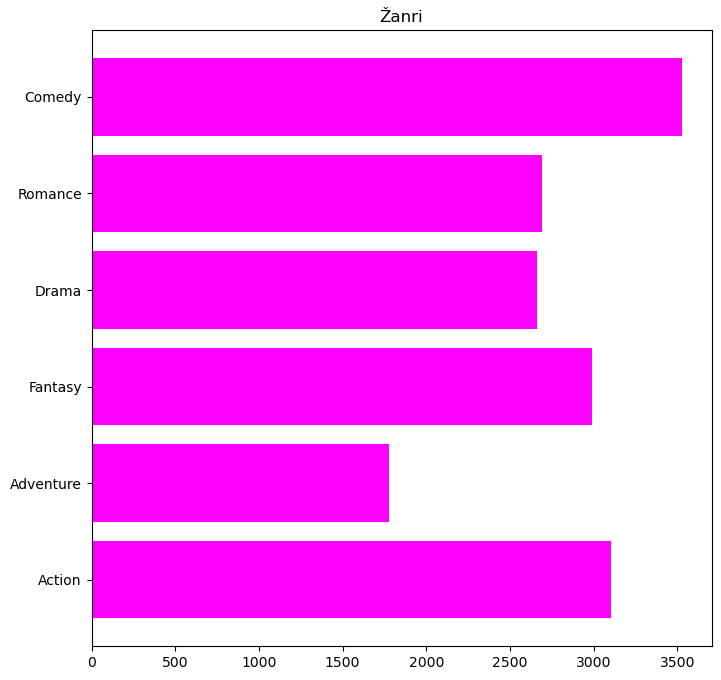

In [18]:

podatki = pandas.read_csv('together.csv')
st_action = podatki.loc[(podatki['žanri'].str.contains('Action'))].count()[0]
st_adventure = podatki.loc[(podatki['žanri'].str.contains('Adventure'))].count()[0]
st_fantasy = podatki.loc[(podatki['žanri'].str.contains('Fantasy'))].count()[0]
st_drama = podatki.loc[(podatki['žanri'].str.contains('Drama'))].count()[0]
st_romance = podatki.loc[(podatki['žanri'].str.contains('Romance'))].count()[0]
st_comedy = podatki.loc[(podatki['žanri'].str.contains('Comedy'))].count()[0]
plt.figure(figsize=(8,8))
plt.barh(['Action', 'Adventure', 'Fantasy', 'Drama', 'Romance', 'Comedy'], 
         [st_action, st_adventure, st_fantasy, st_drama, st_romance, st_comedy], color = 'Magenta')
plt.title("Žanri")
plt.show() 

V zgornjem diagramu sem  prikazal število mang za nekatere najpogostejše žanre v mangah.

## Poglavja

Pri izbiri mang je poleg žanrov tudi zelo pomembno število poglavij, ki jih ima določena manga, saj lahko predvidimo koliko časa bi potrebovali za branje in se na podlagi tega podatka odločimo katere mange je "vredno brati". Število poglavij nam namreč pove kako daleč  se bo razvila zgodba v mangah.

In [13]:
podatki = pandas.read_csv('together.csv')
podatki.sort_values(by=['št poglavij'], ascending=False).head(30)

,id,imena,žanri,jeziki,št poglavij
5405,5405,Martial Peak,"['Action', 'Adventure', 'Fantasy']",EN,3435.0
1993,1993,Chou Kochikame,"['Comedy', 'Parody']",JA,1525.0
2907,2907,Fighting Spirit,"['Action', 'Comedy', 'Drama']",EN,1427.0
8539,8539,The Jobless Siblings,"['Comedy', 'Slice of Life']",EN,1299.0
6088,6088,Nijitte Monogatari,"['Adventure', 'Drama', 'Historical']",JA,1253.0
1796,1796,Case Closed,"['Adventure', 'Comedy', 'Mystery']",EN,1115.0
883,883,Apotheosis – Ascension to Godhood,"['Action', 'Fantasy', 'Harem']",EN,1106.0
7389,7389,Shizukanaru Don: Yakuza Side Story,['Seinen'],JA,1093.0
6241,6241,One Piece,"['Action', 'Adventure', 'Comedy']",EN,1087.0
9561,9561,Versatile Mage,"['Action', 'Adventure', 'Fantasy']",EN,1058.0


Z pomočjo kode lahko vidimo, da ima kar nekaj mang več kot 1000 poglavij. Prav tako pa lahko uporabimo podobno kodo, kot pri žanrih, da dobimo mange z točno določenim številom poglavij. 

In [14]:
podatki = pandas.read_csv('together.csv')
podatki.sort_values(by=['št poglavij'], ascending=False).tail(30)

,id,imena,žanri,jeziki,št poglavij
723,723,Amnesia:Cradle,"['Drama', 'Josei', 'Mystery']",JA,0.0
3836,3836,Hymn of Love,"['Historical', 'Romance', 'Shoujo']",EN,0.0
724,724,Amon,"['Action', 'Demons', 'Fantasy']",nedoločen,0.0
725,725,Amon Game,"['Action', 'Sci-Fi', 'Seinen']",EN,0.0
9590,9590,visual novel,"['Fantasy', 'Historical']",EN,0.0
9589,9589,Vision of Escaflowne,"['Action', 'Drama', 'Fantasy']",JA,0.0
728,728,Amono,"['Drama', 'Psychological', 'Thriller']",nedoločen,0.0
729,729,Amour Sucré,"['Romance', 'School']",nedoločen,0.0
730,730,Amours Blessantes,"['Drama', 'Romance']",nedoločen,0.0
735,735,An Arranged Marriage,['Romance'],EN,0.0


Če nadomestimo .head("število") s .tail("število") dobimo mange, pri katerih še niso bila objavljena nobena poglavja mang. 

## Zaključek

S svojo seminarsko nalogo sem predstavil nekaj osnovnih načinov, po katerih lahko sortiramo mange in se na podlagi tega odločamo, katere bomo brali. Upam, da sem bralcem, ki berejo oziroma bodo začeli brati mango olajšal njihovo izbiro in jih vzpodbudil, da bodo nadaljevali z branjem. Upam, da jim bodo pri tem pomagale tudi zgoraj predstavljene možnosti sortiranja.